# Basic Analysis of Stock Information

In [31]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Initially, install "pip install pandas_datareader" in anaconda, for reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

For our analysis we use 5 tech stocks which we grab data from yahoo using pandas

In [34]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)
for stock in tech_list:   
    globals()[stock] =  DataReader(stock,'yahoo',start,end)

In [36]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,190.594704,186.891937,188.744704,188.793874,3.240418e+07,187.399703
std,21.868579,21.544794,21.700460,21.707355,1.427544e+07,21.414407
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.582779
25%,174.440002,171.380005,172.580002,172.800003,2.276570e+07,171.554230
50%,188.910004,186.139999,187.880005,187.880005,2.850040e+07,186.042618
75%,209.250000,205.479996,207.279999,207.529999,3.876780e+07,205.875610
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,230.275482


In [44]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2018-04-05 to 2019-04-05
Data columns (total 9 columns):
High              253 non-null float64
Low               253 non-null float64
Open              253 non-null float64
Close             253 non-null float64
Volume            253 non-null float64
Adj Close         253 non-null float64
MA for 10 days    244 non-null float64
MA for 20 days    234 non-null float64
MA for 50 days    204 non-null float64
dtypes: float64(9)
memory usage: 19.8 KB


# 1) Change in daily price of the stock

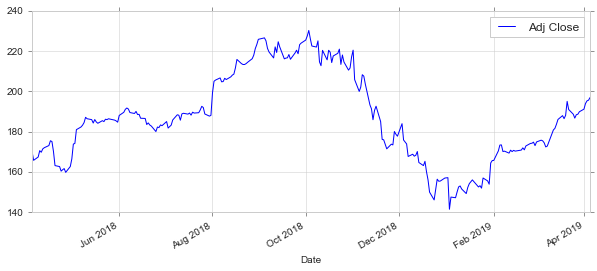

In [39]:
# Now plot out the volume and closing price of the AAPL
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

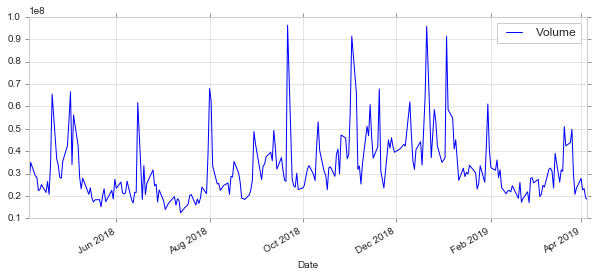

In [40]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

For caculating the moving average for the stock, we need to find the rolling mean and pandas has a built-in rolling mean calculator.

In [42]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

C:\Users\Srikar\Anaconda2\New\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\Srikar\Anaconda2\New\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\Srikar\Anaconda2\New\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  after removing the cwd from sys.path.


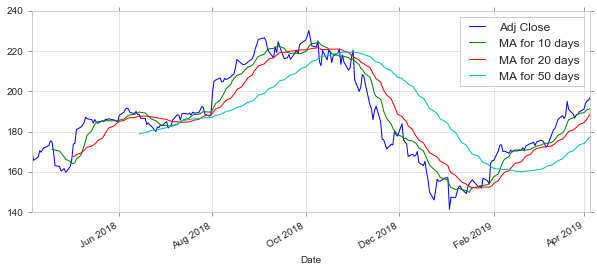

In [43]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

# 2) Daily Return Analysis

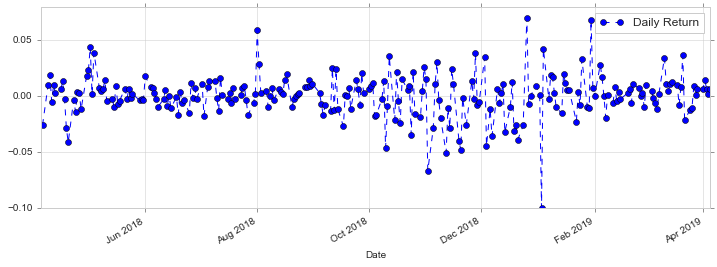

In [45]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

Now we plot the histogram and kde plot at the same time

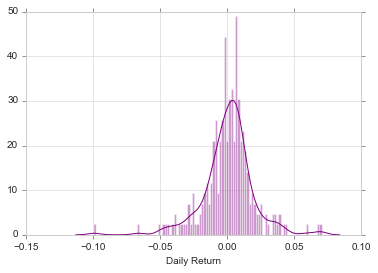

In [46]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')



Now we create a dataframe consisting of closing prices

In [47]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-04-05,170.208206,1451.750000,1027.810059,90.846581
2018-04-06,165.854523,1405.229980,1007.039978,88.732277
2018-04-09,167.499466,1406.079956,1015.450012,89.263313
2018-04-10,170.651459,1436.219971,1031.640015,91.338280
2018-04-11,169.853622,1427.050049,1019.969971,90.335213


In [48]:
tech_rets = closing_df.pct_change()

Now we can check the correlation of two stocks using jointplot

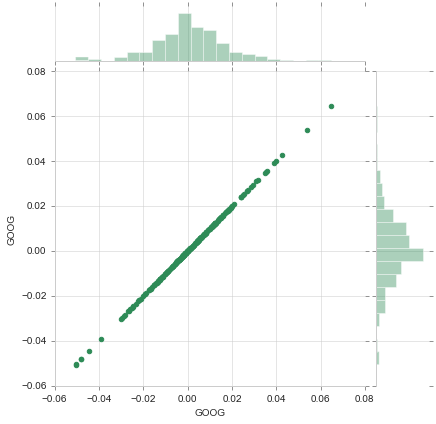

In [49]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

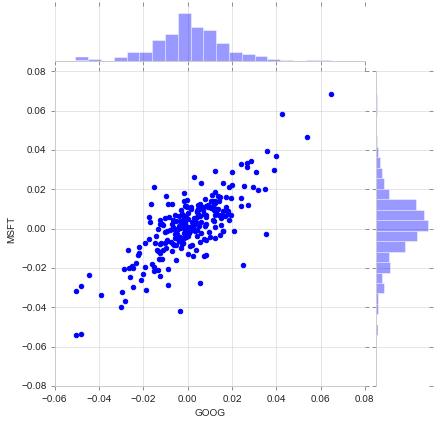

In [50]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

We use pairplot to compare all the stocks

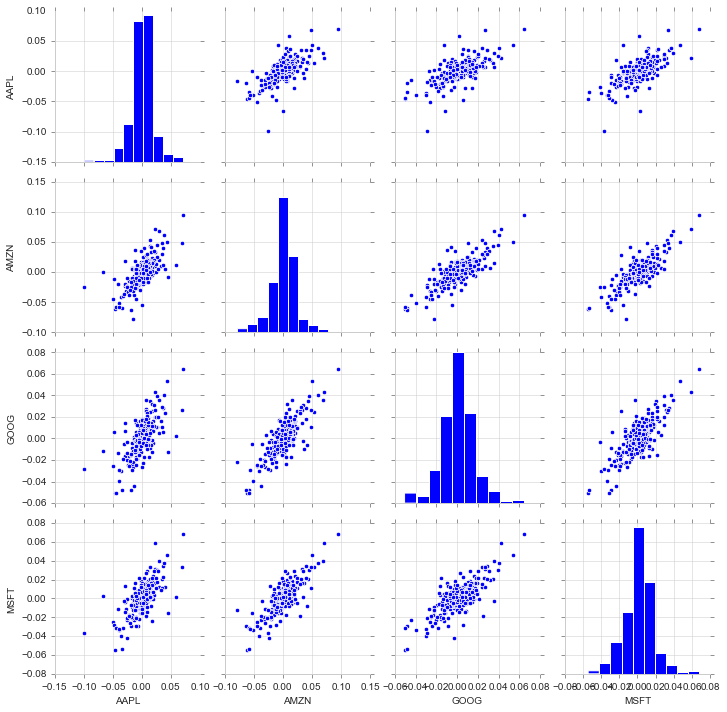

In [51]:
sns.pairplot(tech_rets.dropna())

This shows an interesting correlation between Google and Amazon daily returns

Now we try using the pairGrid


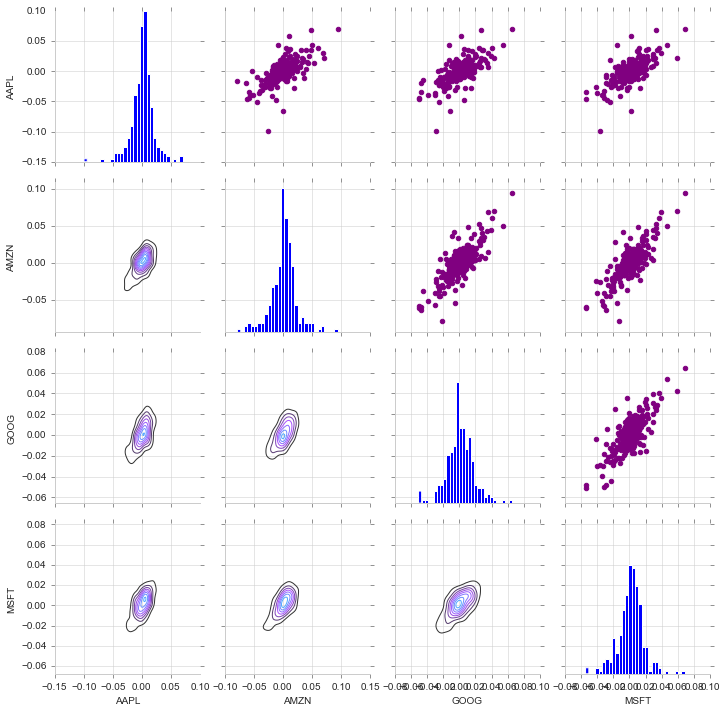

In [52]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

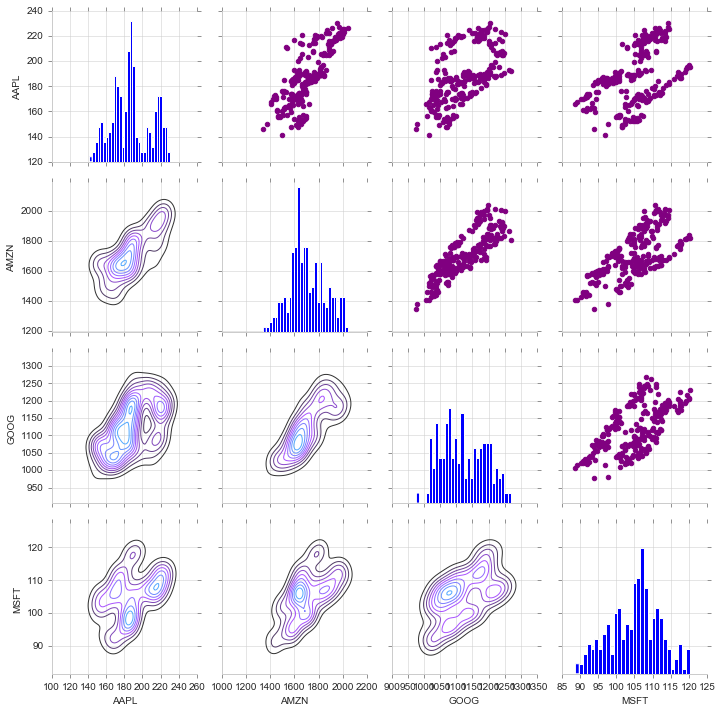

In [53]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Now we see the use of corrplot

In [54]:
sns.corrplot(tech_rets.dropna(),annot=True)

AttributeError: 'module' object has no attribute 'corrplot'

# 3) Risk Analysis

One of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

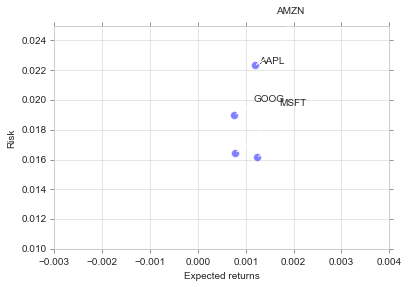

In [57]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))